## 🧮 Python Lab: Matrix Decomposition
#### Principal Component Analysis (PCA)
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 3 - March 1, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week03/03_PCA_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week03/03_PCA_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

## 1️⃣ Data Generation
Generate correlated data using the covariance matrix

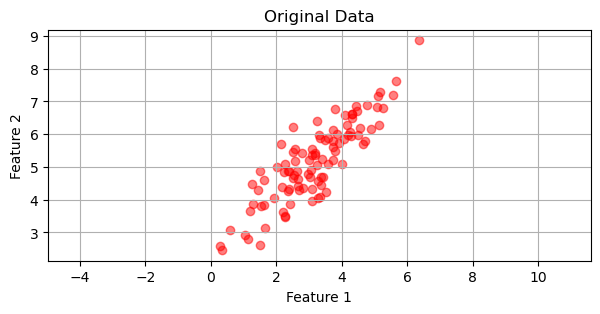

In [7]:
# Generate 2D correlated data
n_samples = 100
mean = [3, 5]
cov = [[2, 1.8], 
       [1.8, 2]]
X = np.random.multivariate_normal(mean, cov, n_samples)

plt.figure(figsize=(7, 3))
plt.scatter(X[:,0], X[:,1], alpha=0.5, color='r')
plt.title("Original Data"), plt.axis('equal')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

## 2️⃣ Data Preprocessing

> **TODO**: Center the data by subtracting the mean (`np.mean()`)

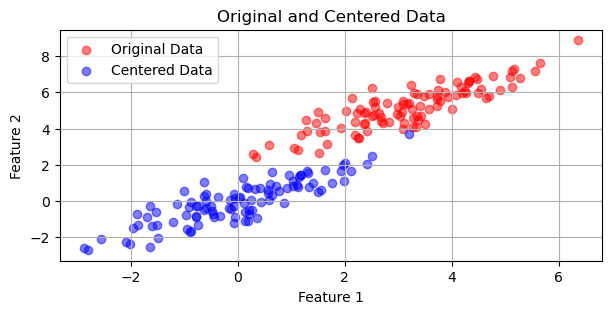

In [10]:
# X_centered = ?

plt.figure(figsize=(7, 3))
plt.scatter(X[:,0], X[:,1], alpha=0.5, color='r', label="Original Data")
plt.scatter(X_centered[:,0], X_centered[:,1], alpha=0.5, color='b', label="Centered Data")
plt.title("Original and Centered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.legend()
plt.show()

## 3️⃣ Covariance Matrix
$\Sigma_{ij} = \frac{1}{n-1} \sum_{k=0}^{n-1}(x_{ki}-\bar{x}_i)(x_{kj}-\bar{x}_j)$

> **TODO**: Compute covariance matrix

In [13]:
# cov_matrix = 

print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[1.51709064 1.29344556]
 [1.29344556 1.46888784]]


> **TODO**: Use `np.cov()` and compare the result

In [15]:
# cov_matrix_np = ?

print("Numpy covariance matrix:\n", cov_matrix_np)

Numpy covariance matrix:
 [[1.51709064 1.29344556]
 [1.29344556 1.46888784]]


## 4️⃣ Eigen Decomposition

> **TODO**: Compute eigenvalues and eigenvectors (`np.linalg.eig()`)

In [18]:
# eigenvalues, eigenvectors = ?

# Sort by descending eigenvalues
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("\nEigenvalues (principal component variances):", eigenvalues)
print("\nEigenvectors (principal components):\n", eigenvectors)


Eigenvalues (principal component variances): [2.78665932 0.19931916]

Eigenvectors (principal components):
 [[ 0.71366318 -0.70048902]
 [ 0.70048902  0.71366318]]


## 5️⃣ Projection

> **TODO**: Project data onto first principal component

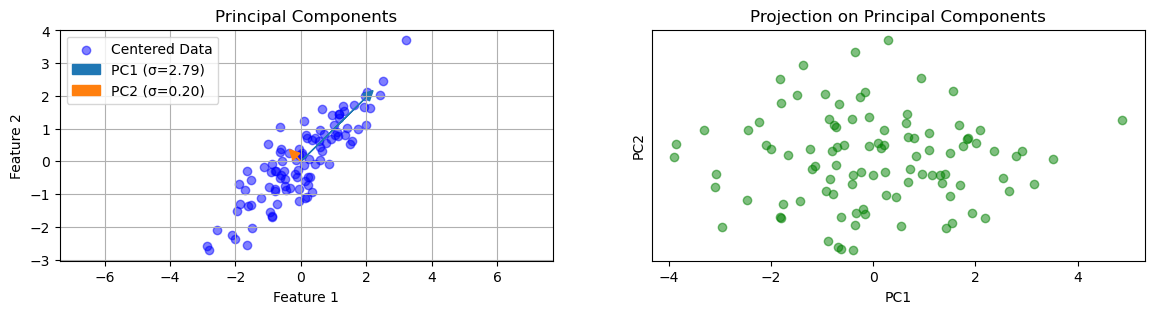

In [21]:
# X_prj = 

# Visualization
plt.figure(figsize=(14, 3))
plt.subplot(121)
plt.scatter(X_centered[:,0], X_centered[:,1], alpha=0.5, color='b', label="Centered Data")

for i in range(2):
    plt.arrow(0, 0, eigenvectors[0, i] * eigenvalues[i], eigenvectors[1, i] * eigenvalues[i],
             head_width=0.3, head_length=0.3, fc=f'C{i}', ec=f'C{i}',
             label=f'PC{i+1} (σ={eigenvalues[i]:.2f})')

plt.title("Principal Components"), plt.axis('equal')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()

plt.subplot(122)
plt.scatter(X_prj[:,0], X_prj[:,1], alpha=0.5, color='g')
plt.title("Projection on Principal Components"), plt.yticks([])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## 6️⃣ Scikit-learn Comparison

In [23]:
# Verify with library implementation
pca = PCA()
X_sklearn = pca.fit_transform(X_centered)

print("Manual vs Sklearn eigenvectors:")
print("Manual:\n", eigenvectors)
print("Sklearn:\n", pca.components_.T)

Manual vs Sklearn eigenvectors:
Manual:
 [[ 0.71366318 -0.70048902]
 [ 0.70048902  0.71366318]]
Sklearn:
 [[ 0.71366318 -0.70048902]
 [ 0.70048902  0.71366318]]


In [24]:
print("Manual vs Sklearn eigenvalues:")
print("Manual:\n", eigenvalues)
print("Sklearn:\n", pca.explained_variance_)

Manual vs Sklearn eigenvalues:
Manual:
 [2.78665932 0.19931916]
Sklearn:
 [2.78665932 0.19931916]


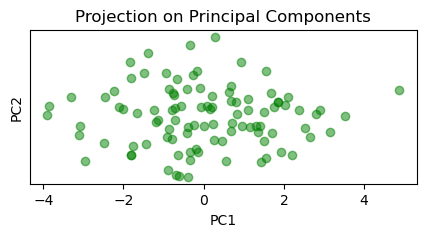

In [25]:
X_prj_sklearn = pca.transform(X_centered)

# Visualization
plt.figure(figsize=(5, 2))
plt.scatter(X_prj_sklearn[:,0], X_prj_sklearn[:,1], alpha=0.5, color='g')
plt.title("Projection on Principal Components"), plt.yticks([])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## 7️⃣ Explained Variance
The variance explained by each principal component

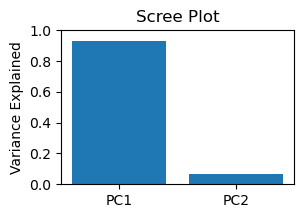

In [28]:
explained_var = eigenvalues / eigenvalues.sum()

plt.figure(figsize=(3, 2))
plt.bar([1,2], explained_var, tick_label=['PC1', 'PC2'])
plt.ylabel("Variance Explained"), plt.title("Scree Plot")
plt.ylim(0,1)
plt.show()

In [29]:
print("Manual vs Sklearn explained variance:")
print("Manual:\n", eigenvalues / eigenvalues.sum())
print("Sklearn:\n", pca.explained_variance_ratio_)

Manual vs Sklearn explained variance:
Manual:
 [0.93324829 0.06675171]
Sklearn:
 [0.93324829 0.06675171]


## 8️⃣ SVD Comparison

In [31]:
# Compute SVD
U_pca, S_pca, Vt_pca = np.linalg.svd(X_centered, full_matrices=False)

In [33]:
# Principal components (eigenvectors)
principal_components = Vt_pca.T

eigenvalues_svd = (S_pca**2) / (n_samples - 1)
print("Eigenvalues (from SVD):", eigenvalues_svd)

print("\nEigenvectors (from SVD):\n", principal_components)

Eigenvalues (from SVD): [2.78665932 0.19931916]

Eigenvectors (from SVD):
 [[ 0.71366318  0.70048902]
 [ 0.70048902 -0.71366318]]


> **TODO**: Reconstruct the plot from section `5️⃣ Projection` using SVD

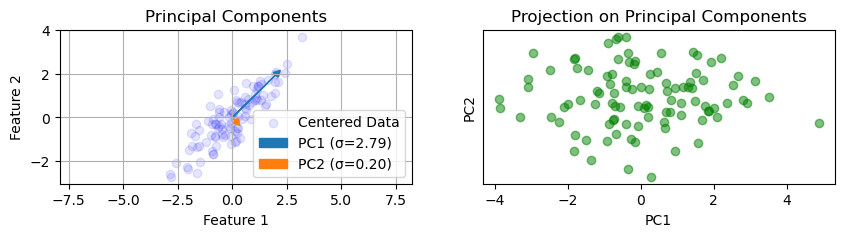

In [35]:
# X_prj_svd = ?

# Visualization
# ...

> **TODO**: Compute the reconstruction error <br>
> _Hint_: Reconstruct the data using `U`, `S`, and `Vt`, then compute the Frobenius norm of the difference between original centered data and reconstructed data <br>
> Reconstruction: `U @ diag(Sigma) @ Vt`

In [37]:
# reconstructed_data = ?
# reconstruction_error = ?

# Print the reconstruction error
print(f"Reconstruction Error: {reconstruction_error}")

Reconstruction Error: 6.1231915311050006e-15
